In [74]:
import pandas as pd
import numpy as np


In [75]:
df = pd.read_csv("/content/spam.csv", encoding="latin-1")

In [76]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5305,ham,\Hi missed your Call and my mumHas beendroppin...,NaN,NaN,NaN
5282,ham,I have gone into get info bt dont know what to do,NaN,NaN,NaN
257,ham,Where are you lover ? I need you ...,NaN,NaN,NaN
806,ham,"sure, but make sure he knows we ain't smokin yet",NaN,NaN,NaN
3614,ham,I enjoy watching and playing football and bask...,NaN,NaN,NaN


In [77]:
df.shape

(5572, 5)

## Data Cleaning

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [79]:
#drop last 3 columns
df.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"],inplace = True)

In [80]:
#renaming the column
df.rename(columns={"v1":"target","v2":"text"},inplace=True)
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [81]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [82]:
df["target"] = encoder.fit_transform(df["target"])


In [83]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [84]:
#missing values
df.isnull().sum()

,0
target,0
text,0


In [85]:
#checking for duplicate values
df.duplicated().sum()

np.int64(403)

In [86]:
#remove duplicates
df = df.drop_duplicates(keep="first")

In [87]:
df.duplicated().sum()

np.int64(0)

In [88]:
df.shape

(5169, 2)

EDA

In [89]:
df["target"].value_counts()

,count
target,
0,4516
1,653


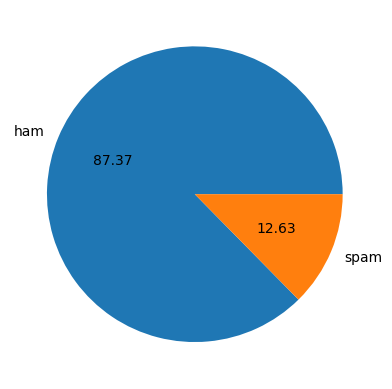

In [90]:
import matplotlib.pyplot as plt
plt.pie(df["target"].value_counts(),labels=["ham","spam"],autopct="%0.2f")
plt.show()

In [91]:
#data is imbalanced

In [92]:
import nltk

In [93]:
nltk.download("punkt")
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [94]:
#creating of new features from existing features
df["num_of_characters"]=df["text"].apply(len)

In [95]:
df.head()

,target,text,num_of_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [96]:
#numner of words
df["num_of_words"]=df["text"].apply(lambda x:len(nltk.word_tokenize(x)))
#word tikenize word by woerd string ko split kar dega

In [97]:
df.tail()

,target,text,num_of_characters,num_of_words
5567,1,This is the 2nd time we have tried 2 contact u...,161,35
5568,0,Will Ì_ b going to esplanade fr home?,37,9
5569,0,"Pity, * was in mood for that. So...any other s...",57,15
5570,0,The guy did some bitching but I acted like i'd...,125,27
5571,0,Rofl. Its true to its name,26,7


In [98]:
df["num_of_sentence"]=df["text"].apply(lambda x:len(nltk.sent_tokenize(x)))
#sent tokenize string ko sentence by sentence  split kar dega

In [99]:
df.sample(5)

,target,text,num_of_characters,num_of_words,num_of_sentence
2813,0,"Alright if you're sure, let me know when you'r...",55,13,1
872,0,I'll text you when I drop x off,31,9,1
813,0,I borrow ur bag ok.,19,6,1
1323,0,I thk 50 shd be ok he said plus minus 10.. Did...,85,21,1
4083,0,Quite ok but a bit ex... U better go eat smth ...,74,19,1


In [100]:
df.head()

,target,text,num_of_characters,num_of_words,num_of_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [101]:
df[["num_of_characters","num_of_words","num_of_sentence"]].describe()

,num_of_characters,num_of_words,num_of_sentence
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [102]:
#analysing ham and spam messages
#ham messages
df[df["target"] == 0][["num_of_characters","num_of_words","num_of_sentence"]].describe()

,num_of_characters,num_of_words,num_of_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [103]:
#for spam messages
df[df["target"] == 1][["num_of_characters","num_of_words","num_of_sentence"]].describe()

,num_of_characters,num_of_words,num_of_sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [104]:
import seaborn as sns

<Axes: xlabel='num_of_characters', ylabel='Count'>

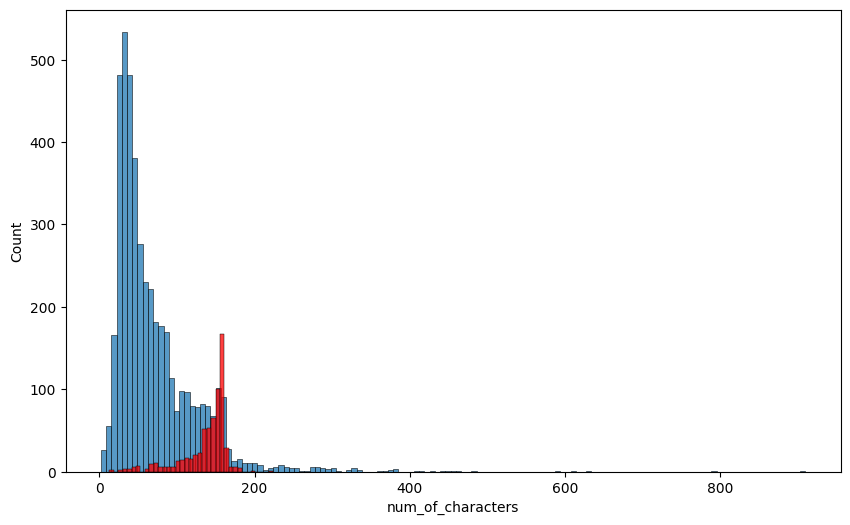

In [105]:
plt.figure(figsize=(10,6))
sns.histplot(df[df["target"] == 0]["num_of_characters"])
sns.histplot(df[df["target"] == 1]["num_of_characters"],color="red")

In [106]:
#conclusion spam messages jayada characters ke bane hain or ham message kam characters ke bane hai

<Axes: xlabel='num_of_words', ylabel='Count'>

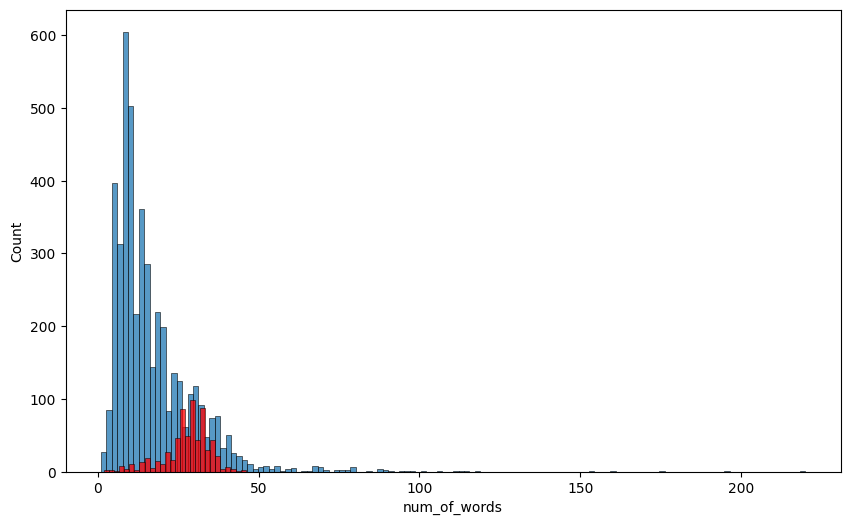

In [107]:
plt.figure(figsize=(10,6))
sns.histplot(df[df["target"] == 0]["num_of_words"])
sns.histplot(df[df["target"] == 1]["num_of_words"],color="red")

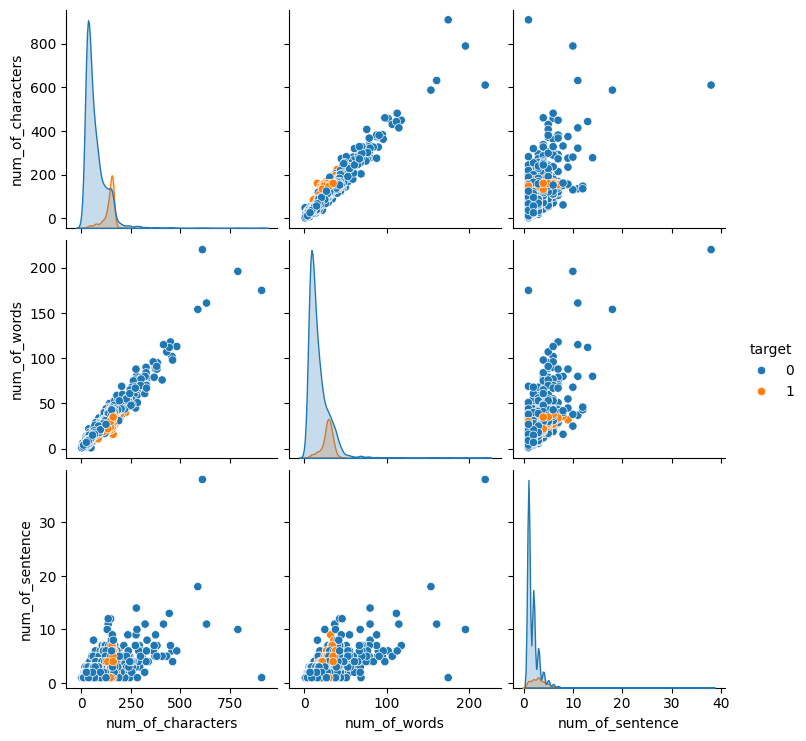

In [108]:
sns.pairplot(df,hue="target")

<Axes: >

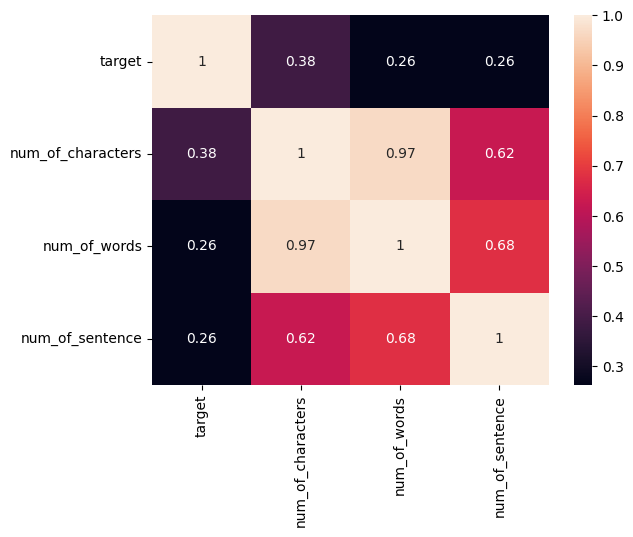

In [109]:
sns.heatmap(df.select_dtypes(include="number").corr(),annot=True)
# df.corr() does not work on text data it works only on numeric data isliye humne sirf number datatype wale columns ko chuna hai

## Data/Text Preprocessing


In [110]:
nltk.download('stopwords')
import string

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [111]:
from nltk.stem import SnowballStemmer
ss = SnowballStemmer('english')#language is rewuired as arguiment always
ss.stem("loving")

'love'

In [112]:
from nltk.stem.snowball import stopwords
def transform_text(text):
  text = text.lower()
  text = nltk.word_tokenize(text)

  y = []
  for i in text:
    if i.isalnum():
      y.append(i)

  text = y[:] #cloning
  y.clear()

  for i in text:
    if i not in stopwords.words("english") and  i not in string.punctuation:
      y.append(i)

  text = y[:]
  y.clear()

  for i in text:
    y.append(ss.stem(i))

  return " ".join(y)

In [113]:
transform_text("Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's")

'free entri 2 wkli comp win fa cup final tkts 21st may text fa 87121 receiv entri question std txt rate c appli 08452810075over18'

In [114]:
df["text"][2]

"Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"

In [115]:
df["transformed_text"] = df['text'].apply(transform_text)

In [116]:
df.head()

,target,text,num_of_characters,num_of_words,num_of_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [117]:
#generating word cloud

In [118]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color="white")

In [119]:
spam_wc = wc.generate(df[df["target"]==1]["transformed_text"].str.cat(sep=" "))

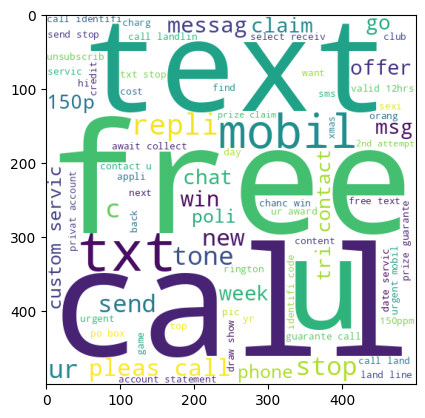

In [120]:
plt.imshow(spam_wc)

In [121]:
ham_wc = wc.generate(df[df["target"]==0]["transformed_text"].str.cat(sep=" "))

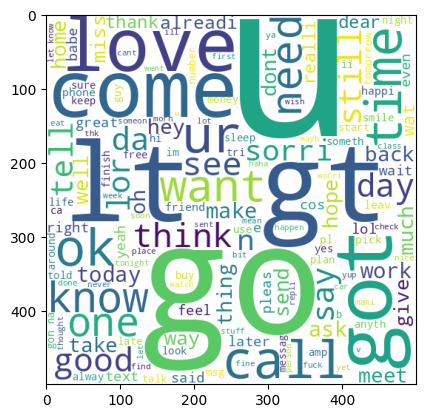

In [122]:
plt.imshow(spam_wc)

In [123]:
df.head()

,target,text,num_of_characters,num_of_words,num_of_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [124]:
spam_corpus = []
for msg in df[df["target"] == 1]["transformed_text"].tolist():
  for word in msg.split():
    spam_corpus.append(word)


In [125]:
len(spam_corpus)

9939

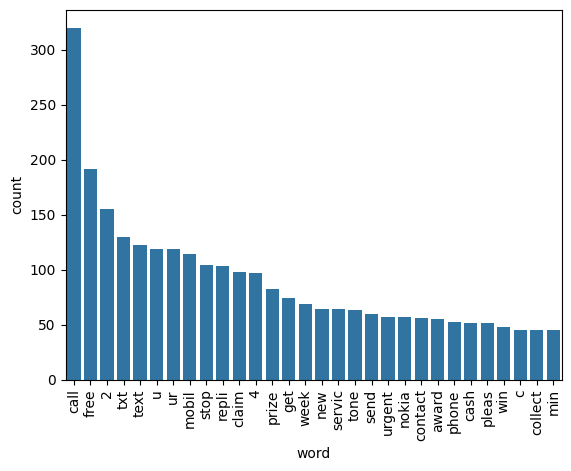

In [126]:
from collections import Counter

df_counts = pd.DataFrame(Counter(spam_corpus).most_common(30),
                         columns=["word", "count"])
sns.barplot(x="word", y="count", data=df_counts)
plt.xticks(rotation=90)
plt.show()

## Model building

In [127]:
X = df["transformed_text"]
y = df["target"].values

In [128]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [129]:
X

,transformed_text
0,go jurong point crazi avail bugi n great world...
1,ok lar joke wif u oni
2,free entri 2 wkli comp win fa cup final tkts 2...
3,u dun say earli hor u c alreadi say
4,nah think goe usf live around though
...,...
5567,2nd time tri 2 contact u pound prize 2 claim e...
5568,b go esplanad fr home
5569,piti mood suggest
5570,guy bitch act like interest buy someth els nex...


In [130]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [131]:
#bow
# from sklearn.feature_extraction.text import CountVectorizer
# cv = CountVectorizer()

# tfidf
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)

In [132]:
# X_train = tfidf.fit_transform(X_train) #sparse matrix
X_train = tfidf.fit_transform(X_train).toarray() #dense matrix

X_test = tfidf.transform(X_test).toarray()
# X_test = tfidf.transform(X_test)

In [133]:
print(X_train.shape)
print(X_test.shape)

(4135, 3000)
(1034, 3000)


In [134]:
print(y_train.shape)
print(y_test.shape)

(4135,)
(1034,)


In [135]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score

In [136]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [137]:
# 👉 GaussianNB only works with dense arrays. baki sparse pe kaam karte hain
# is liye hm data ko .toarray() se dense me convert karte hain
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8481624758220503
[[761 135]
 [ 22 116]]
0.46215139442231074


In [138]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9690522243713733
[[896   0]
 [ 32 106]]
1.0


In [139]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9806576402321083
[[896   0]
 [ 20 118]]
1.0


In [140]:
#we choose tfidf + mnb because precision is 1 in mnb

In [141]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [142]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [143]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': bnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [144]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [145]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9777562862669246, 0.9752066115702479)

In [146]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9777562862669246
Precision -  0.9752066115702479
For  KN
Accuracy -  0.9081237911025145
Precision -  1.0
For  NB
Accuracy -  0.9806576402321083
Precision -  1.0
For  DT
Accuracy -  0.9284332688588007
Precision -  0.8636363636363636
For  LR
Accuracy -  0.9555125725338491
Precision -  0.9509803921568627
For  RF
Accuracy -  0.9729206963249516
Precision -  0.9741379310344828
For  AdaBoost
Accuracy -  0.9235976789168279
Precision -  0.8554216867469879
For  BgC
Accuracy -  0.9564796905222437
Precision -  0.8842975206611571
For  ETC
Accuracy -  0.97678916827853
Precision -  0.9830508474576272
For  GBDT
Accuracy -  0.9497098646034816
Precision -  0.93
For  xgb
Accuracy -  0.9690522243713733
Precision -  0.9491525423728814


In [147]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)


In [148]:
performance_df


,Algorithm,Accuracy,Precision
1,KN,0.908124,1.000000
2,NB,0.980658,1.000000
8,ETC,0.976789,0.983051
0,SVC,0.977756,0.975207
5,RF,0.972921,0.974138
4,LR,0.955513,0.950980
10,xgb,0.969052,0.949153
9,GBDT,0.949710,0.930000
7,BgC,0.956480,0.884298
3,DT,0.928433,0.863636


In [149]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [150]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.908124
1,NB,Accuracy,0.980658
2,ETC,Accuracy,0.976789
3,SVC,Accuracy,0.977756
4,RF,Accuracy,0.972921
5,LR,Accuracy,0.955513
6,xgb,Accuracy,0.969052
7,GBDT,Accuracy,0.949710
8,BgC,Accuracy,0.956480
9,DT,Accuracy,0.928433


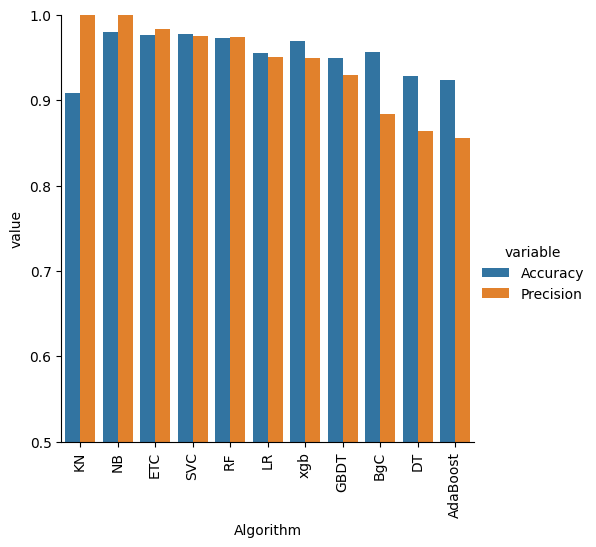

In [151]:
sns.catplot(x = 'Algorithm', y='value',
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [152]:

# model improve
# 1. Change the max_features parameter of TfIdf

In [153]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)


In [154]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)


In [155]:
new_df = performance_df.merge(temp_df,on='Algorithm')


In [156]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')


In [157]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)



In [158]:
new_df_scaled.merge(temp_df,on='Algorithm')


,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.908124,1.000000,0.908124,1.000000,0.908124,1.000000,0.908124,1.000000
1,NB,0.980658,1.000000,0.980658,1.000000,0.980658,1.000000,0.980658,1.000000
2,ETC,0.976789,0.983051,0.976789,0.983051,0.976789,0.983051,0.976789,0.983051
3,SVC,0.977756,0.975207,0.977756,0.975207,0.977756,0.975207,0.977756,0.975207
4,RF,0.972921,0.974138,0.972921,0.974138,0.972921,0.974138,0.972921,0.974138
5,LR,0.955513,0.950980,0.955513,0.950980,0.955513,0.950980,0.955513,0.950980
6,xgb,0.969052,0.949153,0.969052,0.949153,0.969052,0.949153,0.969052,0.949153
7,GBDT,0.949710,0.930000,0.949710,0.930000,0.949710,0.930000,0.949710,0.930000
8,BgC,0.956480,0.884298,0.956480,0.884298,0.956480,0.884298,0.956480,0.884298
9,DT,0.928433,0.863636,0.928433,0.863636,0.928433,0.863636,0.928433,0.863636


In [159]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
# mnb = MultinomialNB()
bnb = BernoulliNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [160]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', bnb), ('et', etc)],voting='soft')


In [161]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', BernoulliNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [162]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9845261121856866
Precision 1.0


In [163]:
# Applying stacking
estimators=[('svm', svc), ('nb', bnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [164]:
from sklearn.ensemble import StackingClassifier

In [165]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [166]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9835589941972921
Precision 0.984


In [167]:
#perform this step in the last
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(voting,open('model.pkl','wb'))